In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import multivariate_normal

### Foundation of Probability Theory
We want to be able to describe how much we believe in different statements. Paricularly, we want to be able to say when two statements A and B are equally plausible, or when A is more plausible than B and vice versa. <br>
Assuming some axioms (universal comparability, transivity) we can assign a function $P$ to represent plausibility, with the properties: <br>
$P(A)>P(B)$ iff A is more plausible than B <br>
$P(A)=P(B)$ iff A and B are equally plausible <br>
Along with other axioms, the basic building blocks of probability theory are formed. <br>
Particularly, probabilities are defined as non-negative real values that sum to 1, and the probability of the union of two independent events is the probability of each alone multiplied. <br>
See https://en.wikipedia.org/wiki/Probability_axioms for a full explanation. <br>

### Discrete and Continous Distributions
A discrete distribution is an assignment of probabilities to a discrete set of events. <br>
We write $P(X=i)$ to mean the probability of value $i$ being true value from set of possible values $X$ <br> Consider $i$ a particular statement, which has a particular plausiblity. <br> <br>
A continous distribution has its values represented by a function, called the probability density function (pdf). The probability a value is in the range $x,x+dx$ is equal to $p(x)dx$, as $dx$ tends to 0. This is just stating the obvious, that as $dx$ tends to 0 the approximation of $p(x)dx$ gets closer to the true probability. Naturally then the integration of $p(x)$ must equal to 1. <br>
This can be visualized using a histogram of values. A histogram breaks the probabilities into sections, and takes the average. As the number of sections/bins grows the approximation of each bin to the truth gets better. This is the same as decreasing $dx$: <br>

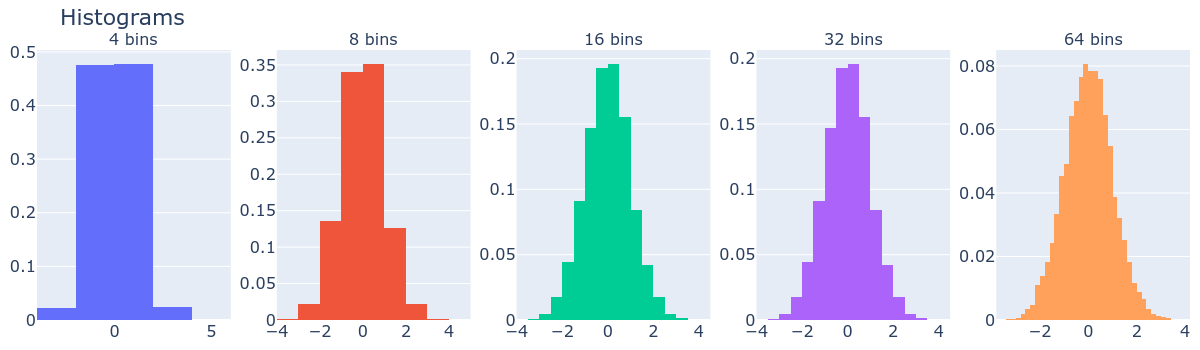

In [10]:
dis_samples = np.random.normal(0,1,10000)
fig = make_subplots(rows=1,cols=5,subplot_titles=("4 bins", "8 bins", "16 bins", "32 bins", "64 bins"))
fig.add_trace(go.Histogram(x=dis_samples, nbinsx=4,histnorm='probability'),row=1,col=1)
fig.add_trace(go.Histogram(x=dis_samples, nbinsx=8,histnorm='probability'),row=1,col=2)
fig.add_trace(go.Histogram(x=dis_samples, nbinsx=16,histnorm='probability'),row=1,col=3)
fig.add_trace(go.Histogram(x=dis_samples, nbinsx=32,histnorm='probability'),row=1,col=4)
fig.add_trace(go.Histogram(x=dis_samples, nbinsx=64,histnorm='probability'),row=1,col=5)
fig.update_layout(margin=dict(t=50,l=10,b=10,r=10),showlegend=False,title="Histograms",font=dict(size=16))
fig.show(renderer="png",width=1200,height=350)

As $dx$ shrinks estimatation $p(x)dx$ becomes more accurate. <br>
The distribution can also be represented by a cumulative distribution function (cdf), which describes the probability the value in question falls below some limit $x$. <br>
The cdf is the integration of the pdf between -$\infty$ and $x$. This is natural as the integration of a function is the area under the functions. It is then possible to states the probability of a sample from the distribution falling in between two values $a$ and $b$ as the integration of the pdf between $a$ and $b$: $\int_{x=a}^b p(x)dx$ <br>
The support of a distribution are the values in which it is non-zero. 

### The Gaussian Distribution:
The Gaussian is the most common distribution, defined by a mean $\mu$ and standard deviation $\sigma$. <br>
$$p(x|\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}e^{\left (\displaystyle -\frac{1}{2\sigma^2}(x-\mu)^2 \right)}$$
Distributions like the gaussian which can technically produce any valued output can be truncated to sit within a range. A Gaussian is unimodal because it has a single point at which the distribution peaks.

### Mixture Models:
A Mixture Model is simply a weighted sum of distributions. For instance:

In [3]:
def Gaussian_pdf (x,mean,std):
    return 1/(std*np.sqrt(2*np.pi))*np.exp(-1/(2*std**2)*(x-mean)**2)

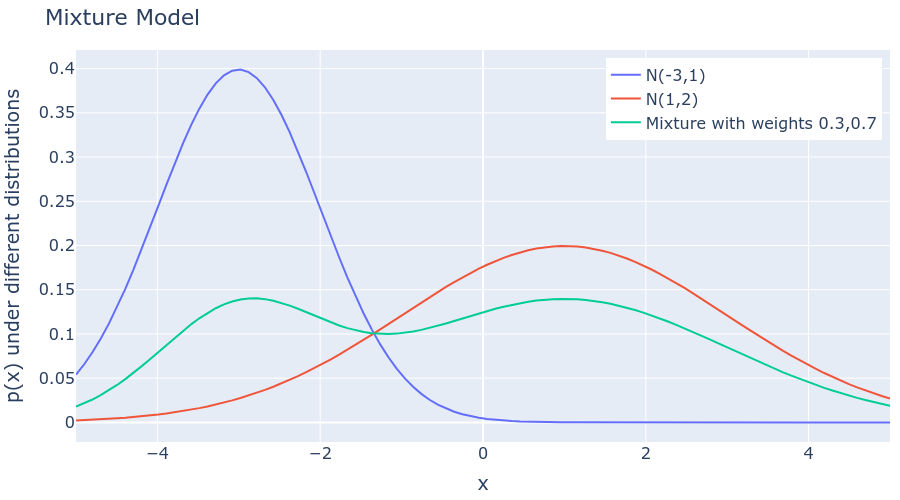

In [4]:
x = np.linspace(-5,5,100)
p_m1 = Gaussian_pdf(x,-3,1) # gaussian at mean -3, with std 1
p_m2 = Gaussian_pdf(x,1,2) # gaussian at mean 1, with std 2
p_mixture = 0.3*p_m1+0.7*p_m2

fig = go.Figure()
fig.add_trace(go.Scatter(x=x,y=p_m1,name="N(-3,1)"))
fig.add_trace(go.Scatter(x=x,y=p_m2,name="N(1,2)"))
fig.add_trace(go.Scatter(x=x,y=p_mixture,name="Mixture with weights 0.3,0.7"))
fig.update_layout(margin=dict(t=50,l=10,b=10,r=10),showlegend=True,title="Mixture Model",font=dict(size=16))
fig.update_xaxes(title_text="x")
fig.update_yaxes(title_text="p(x) under different distributions")
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.98,
    xanchor="right",
    x=0.99
))

fig.show(renderer="png",width=900,height=500)

If the "mixing weights" sum to 1, then the distribution is normalized.<br>
Proof: <br>
$\int_x af(x)+bg(x) dx = \int_x af(x) + \int_x bg(x)$ <br>
$= a\int_x f(x) + b\int_x g(x)$
$= a + b $ if $f(x)$ and $g(x)$ are normalized distributions. <br>
(In all these cases the integral is between $-\infty$ and $\infty$)

### Joint Distributions:
When we have multiple variables we can write the probability of both together: $p(x,y)$ <br>
A variable in a joint distribution can be summed out to give the marginal of the other variable: <br>
$\sum_y p(x,y)=p(x)$
The number of variables required to describe a joint probability grows as the number of options for each variable grows. For instance, if $X$ can take 4 values and $Y$ can take 5 values, then $5\times4=20$ values are required to describe the joint distribution, corresponding to the probability of each value in the 4 possible $X$ values and 5 possible $Y$ values occuring. However, due to the law that the total probability must sum to 1, then the actual number is 19, as the last probability can be figured out by removing the sum of the other probabilities from 1. 

### Independence:
One way to reduce the number of parameters in a model is to assume independence between some variables. <br>
Independence means $p(A,B)=p(A)p(B)$. Therefore, you only need to know $P(A)$ and $P(B)$, not any of the joint probabilities. This reduces the cost to the number of options for $A$ times the number of options for $B$. For $n$ binary variables (0 or 1) this cost is $O(n)$ instead of $O(2^n)$ <br>
**Example:** Say we have 3 independent binary variables, $A$,$B$,$C$ with $P(A=1)=0.4$, $P(B=1)=0.75$, $P(C=1)=0.85$. <br>
The joint:

In [5]:
joint_states = np.mgrid[:2,:2,:2].reshape(3,8).T
pA = (joint_states[:,0]==0)*0.4+(joint_states[:,0]==1)*0.6
pB = (joint_states[:,1]==0)*0.75+(joint_states[:,1]==1)*0.25
pC = (joint_states[:,2]==0)*0.85+(joint_states[:,2]==1)*0.15
pJoint = pA*pB*pC
joint_state_with_pJoint = np.concatenate([joint_states,pJoint.reshape(-1,1)],axis=1)
print(joint_state_with_pJoint, "<- joint state and prob")
assert(np.isclose(np.sum(joint_state_with_pJoint[:,-1]),1))

[[0.     0.     0.     0.255 ]
 [0.     0.     1.     0.045 ]
 [0.     1.     0.     0.085 ]
 [0.     1.     1.     0.015 ]
 [1.     0.     0.     0.3825]
 [1.     0.     1.     0.0675]
 [1.     1.     0.     0.1275]
 [1.     1.     1.     0.0225]] <- joint state and prob


### A Decision Tree can also be used to compress the number of parameters in a model
For instance, say p(X,Y) is always 0.2 if X=0 (regardless of $Y$), and otherwise p(X=1,Y=1)=0.3. <br>
Then the tree to get the probability of any two options is: <br>
X = 0: <br> 
&nbsp;&nbsp;0.2 <br>
X = 1: <br>
&nbsp;&nbsp;Y = 0: <br>
&nbsp;&nbsp;&nbsp;&nbsp;0.5 <br>
&nbsp;&nbsp;Y = 1: <br>
&nbsp;&nbsp;&nbsp;&nbsp;0.1 <br>
<br>
So, the variables to know are just 0.2,0.5 and the structure of the tree. (0.1 can be figured out by summing to 1) <br>
The full joint requires another parameter:

In [6]:
print(np.concatenate([np.mgrid[:2,:2].reshape(2,4).T,np.array([0.2,0.2,0.5,0.1]).reshape(-1,1)],axis=1))

[[0.  0.  0.2]
 [0.  1.  0.2]
 [1.  0.  0.5]
 [1.  1.  0.1]]


### Mixture of uniform distributions:
A continous value $X$ (bounded between say 0 and 1) can be modeled by multiple uniform distributions. This is essentially what a histogram is. But, that can also be true in 2D. E.g, say the values in $X$ are in 4 uniform patches and 3 with $Y$ (also bounded 0 - 1):

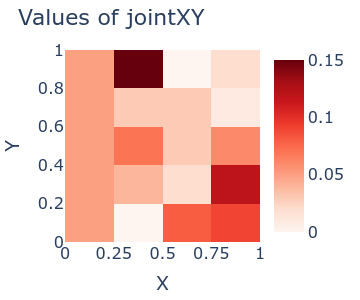

In [7]:
jointXY = np.array([[0.05,0.15,0.00,0.02],
                    [0.05,0.03,0.03,0.01],
                    [0.05,0.07,0.03,0.06],
                    [0.05,0.04,0.02,0.12],
                    [0.05,0.00,0.08,0.09]])

fig = go.Figure()
fig.add_trace(go.Heatmap(z=np.flip(jointXY,axis=0),showscale=True,colorscale="reds"))
fig.update_layout(margin=dict(t=50,l=10,b=10,r=10),showlegend=False,title="Values of jointXY",font=dict(size=16))
fig.update_xaxes(title_text="X", tickvals=np.arange(5)-0.5,ticktext=[0,0.25,0.5,0.75,1.0])
fig.update_yaxes(title_text="Y", tickvals=np.arange(6)-0.5,ticktext=[0,0.2,0.4,0.6,0.8,1.0])
fig.show(renderer="png",width=360,height=300)

In the above case, as all the probabilities for $X$ in the range 0 to 0.25 are the same, then some compression can occur (e.g decision tree): <br>
X<0.25: <br>
&nbsp;&nbsp; 0.05 <br>
X>0.25: ...

### The Multivariate Gaussian:
Another very important distribution. Defined by mean vector $\mu$ and covariance matrix $\Sigma$.

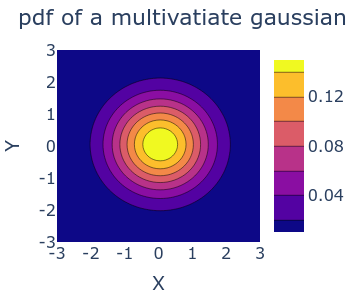

In [51]:
mean_m1 = np.zeros(2)
cov_m1 = np.array([[1,0],[0,1]])
points = np.mgrid[-3:3:0.1,-3:3:0.1].reshape(2,60*60)
p_points_m1 = multivariate_normal.pdf(points.T,mean_m1,cov_m1)
fig = go.Figure()
fig.add_trace(go.Contour(z=p_points_m1.reshape(60,60)))
fig.update_layout(margin=dict(t=50,l=10,b=10,r=10),showlegend=False,title="pdf of a multivatiate gaussian",font=dict(size=16))
fig.update_xaxes(title_text="X", tickvals=np.linspace(0,59,7),ticktext=[-3,-2,-1,0,1,2,3])
fig.update_yaxes(title_text="Y", tickvals=np.linspace(0,59,7),ticktext=[-3,-2,-1,0,1,2,3])
fig.show(renderer="png",width=360,height=300)

### Conditional Probabilities:
